In [101]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import wrangle as w

In [102]:
def read_wine():
    red = pd.read_csv('winequality-red.csv')
    white = pd.read_csv('winequality-white.csv')
    return red, white

In [124]:
df = read_wine()

In [3]:
# create columns to seperate wine types --  encode
red['red_wine'] = 1
white['red_wine'] = 0

red['wine_type'] = 'red'
white['wine_type'] = 'white'


In [105]:
def clean_wine():
    # get datasets 
    red, white = read_wine()
    
    # create columns to seperate wine types --  encode
    red['red_wine'] = 1
    white['red_wine'] = 0

    red['wine_type'] = 'red'
    white['wine_type'] = 'white'
    # combine red & white wine dataset
    df = pd.concat([red, white])
    
    # remove outliers -- removed outliers outside of 4 standard deviation
    df = remove_outliers(df, 'wine_type')
    
    # fix names for columns
    new_col_name = []
    
    for col in df.columns:
        new_col_name.append(col.lower().replace(' ', '_'))

    df.columns = new_col_name
    
    # reset index
    df = df.reset_index().drop(columns=['index'])
    
    return df



In [36]:
clean_wine()

46 outliers removed from fixed acidity.
26 outliers removed from volatile acidity.
11 outliers removed from citric acid.
5 outliers removed from residual sugar.
63 outliers removed from chlorides.
15 outliers removed from free sulfur dioxide.
2 outliers removed from total sulfur dioxide.
0 outliers removed from density.
4 outliers removed from pH.
21 outliers removed from sulphates.
0 outliers removed from alcohol.
0 outliers removed from quality.
0 outliers removed from red_wine.

Total of 193 outliers removed.


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,red_wine,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,white


In [125]:
df = clean_wine()

46 outliers removed from fixed acidity.
26 outliers removed from volatile acidity.
11 outliers removed from citric acid.
5 outliers removed from residual sugar.
63 outliers removed from chlorides.
15 outliers removed from free sulfur dioxide.
2 outliers removed from total sulfur dioxide.
0 outliers removed from density.
4 outliers removed from pH.
21 outliers removed from sulphates.
0 outliers removed from alcohol.
0 outliers removed from quality.
0 outliers removed from red_wine.

Total of 193 outliers removed.


In [117]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,red_wine,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,white


In [149]:
def split_data(df, stratify_name=None):
    '''
    Takes in two arguments the dataframe name and the ("stratify_name" - must be in string format) to stratify  and 
    return train, validate, test subset dataframes will output train, validate, and test in that order
    '''
    train, test = train_test_split(df, #first split
                                   test_size=.2, 
                                   random_state=123, 
                                   stratify=df[stratify_name])
    train, validate = train_test_split(train, #second split
                                    test_size=.25, 
                                    random_state=123,
                                    stratify=df[stratify_name])
    return train, validate, test

In [126]:
df.reset_index(drop=True, inplace=True)


In [4]:
# rows & columns
red.shape

(1599, 14)

In [5]:
# rows & columns
white.shape

(4898, 14)

In [6]:
df = pd.concat([red, white])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
 13  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 761.4+ KB


In [8]:
# found no nulls 
df[df.isnull()].sum()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
wine_type                 0
red_wine                0.0
dtype: object

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1


In [10]:
def outlier(df, feature, m=1.5):
    '''
    outlier will take in a dataframe's feature:
    - calculate it's 1st & 3rd quartiles,
    - use their difference to calculate the IQR
    - then apply to calculate upper and lower bounds
    - using the `m` multiplier
    '''
    q1 = df[feature].quantile(.25)
    q3 = df[feature].quantile(.75)
    
    iqr = q3 - q1
    
    upper_bound = q3 + (m * iqr)
    lower_bound = q1 - (m * iqr)
    
    return upper_bound, lower_bound

In [130]:
for col in df.columns[:-1]:
    upper_bound, lower_bound = outlier(df, col)
    print(col)
    print(upper_bound)
    print(lower_bound)
    
# there arent any crazy outliers -- leave in dataset

fixed_acidity
9.399999999999999
4.600000000000001
volatile_acidity
0.655
-0.024999999999999994
citric_acid
0.6000000000000001
0.03999999999999998
residual_sugar
17.799999999999997
-7.8
chlorides
0.098
0.001999999999999995
free_sulfur_dioxide
77.0
-19.0
total_sulfur_dioxide
270.0
-34.0
density
1.00386
0.9853000000000001
ph
3.635
2.795
sulphates
0.855
0.175
alcohol
14.000000000000002
6.799999999999999
quality
7.5
3.5
red_wine
0.0
0.0


In [131]:
def get_object_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # get a list of the column names that are objects (from the mask)
    object_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    return object_cols



def get_numeric_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # get a list of the column names that are objects (from the mask)
    num_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()
    
    return num_cols


In [132]:
def summarize(df):
    '''
    summarize will take in a single argument (a pandas dataframe) 
    and output to console various statistics on said dataframe, including:
    # .head()
    # .info()
    # .describe()
    # .value_counts()
    # observation of nulls in the dataframe
    # distribution of numerical attributes
    '''
    print(f"""SUMMARY REPORT
=====================================================
          
          
Dataframe head: 
{df.head(3)}
          
=====================================================
          
          
Dataframe info: """)
    df.info()

    print(f"""=====================================================
          
          
Dataframe Description: 
{df.describe().T}
          
=====================================================

    
    
DataFrame value counts: 
 """)         
    for col in (get_object_cols(df)): 
        print(f"""******** {col.upper()} - Value Counts:
{df[col].value_counts()}
    _______________________________________""")                   
        
    for col in df.columns:
        fig, ax = plt.subplots(figsize=(6, 4))
        sns.histplot(df[col], ax=ax)
        ax.set_title(f'Histogram of {col}')
        plt.show()

SUMMARY REPORT
          
          
Dataframe head: 
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  red_wine wine_type  
0      9.4        5         1       red  
1      9.8        5         1       red  
2      9.8        5         1       red  
          
          
          
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6304 entries, 0 to 6303
Data columns (total 14 columns):
 #   Column

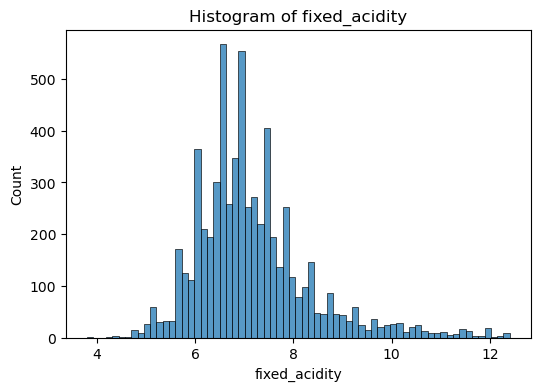

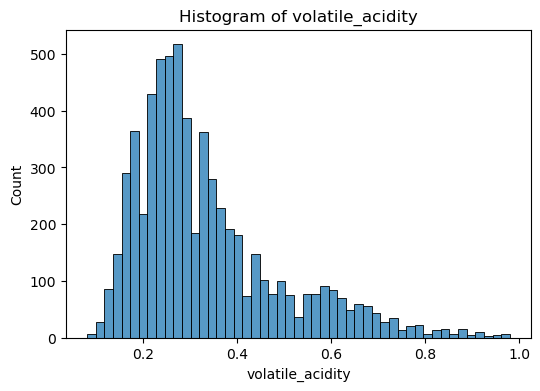

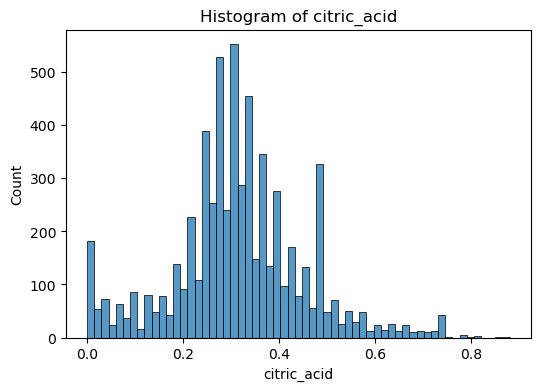

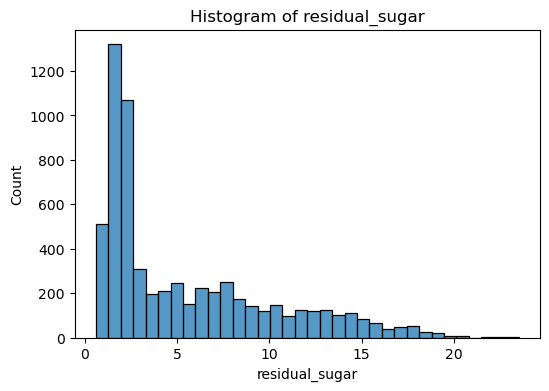

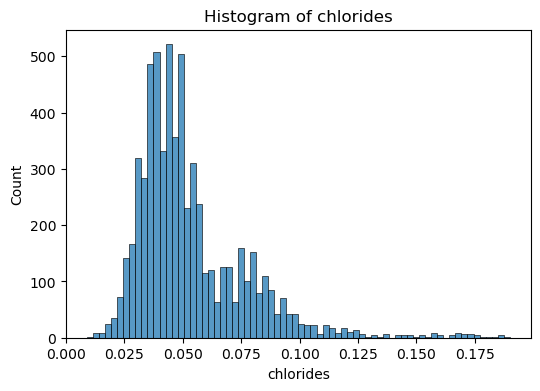

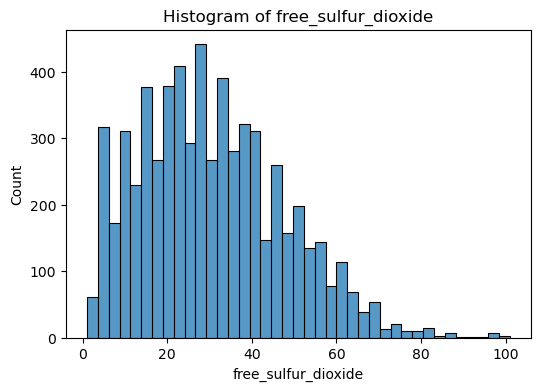

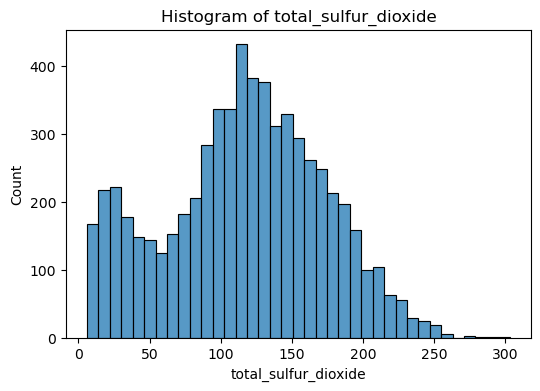

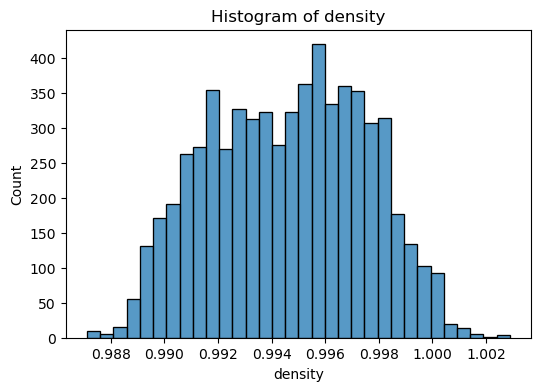

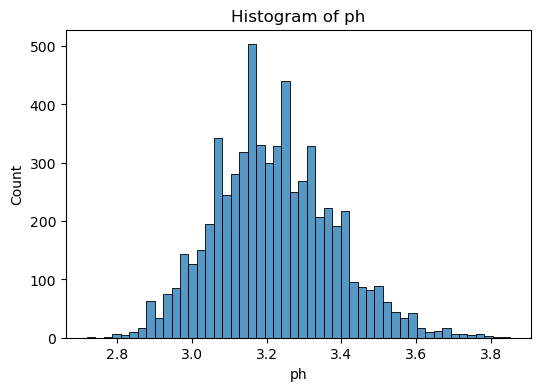

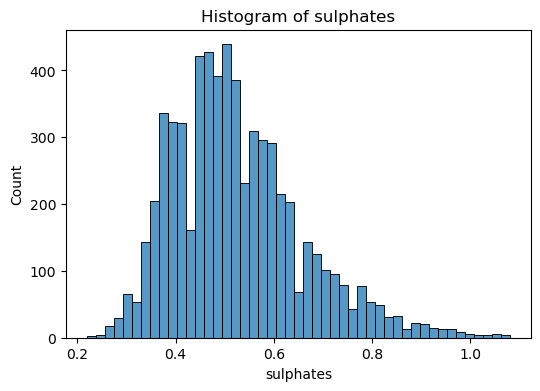

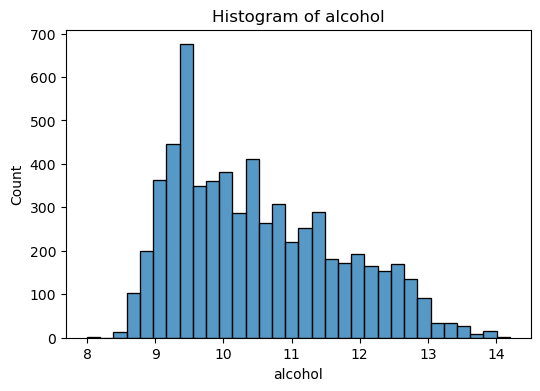

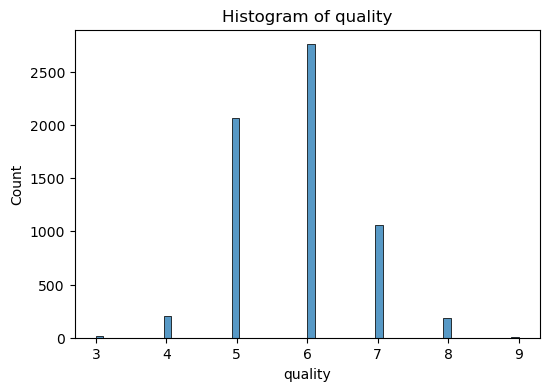

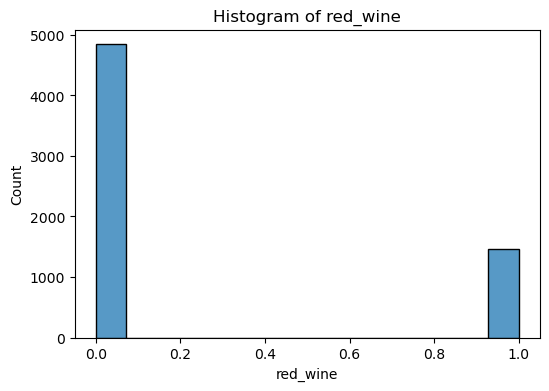

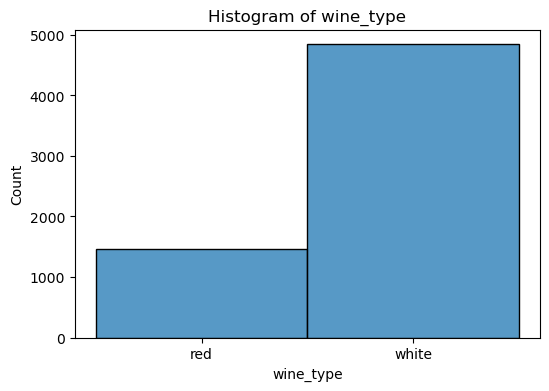

In [133]:
w.summarize(df)

* sulphates, density, total sulfur dioxide, free sulfur dioxide, chlorides, residual sugar, citric acid, volatile acidity   has outliers

In [134]:
from scipy import stats
# removed outliers outside 4 standard deviation
def remove_outliers(df, exclude_column=[], sd=4):
    """
    Remove outliers from a pandas DataFrame using the Z-score method.
    
    Args:
    df (pandas.DataFrame): The DataFrame containing the data.
    
    Returns:
    pandas.DataFrame: The DataFrame with outliers removed.
    """
    num_outliers_total = 0
    for column in df.columns:
        if column == exclude_column:
            continue
        series = df[column]
        z_scores = np.abs(stats.zscore(series))
        num_outliers = len(z_scores[z_scores > sd])
        num_outliers_total += num_outliers
        df = df[(z_scores <= sd) | pd.isnull(df[column])]
        print(f"{num_outliers} outliers removed from {column}.")
    print(f"\nTotal of {num_outliers_total} outliers removed.")
    return df

In [135]:
# handle outliers
df = w.remove_outliers(df, 'wine_type')

32 outliers removed from fixed_acidity.
10 outliers removed from volatile_acidity.
1 outliers removed from citric_acid.
0 outliers removed from residual_sugar.
62 outliers removed from chlorides.
5 outliers removed from free_sulfur_dioxide.
0 outliers removed from total_sulfur_dioxide.
0 outliers removed from density.
0 outliers removed from ph.
6 outliers removed from sulphates.
0 outliers removed from alcohol.
0 outliers removed from quality.
0 outliers removed from red_wine.

Total of 116 outliers removed.


In [136]:
def analyze_missing_values(df):
    """
    Analyzes missing values in a dataframe and returns a summary dataframe.

    Args:
        df (pandas.DataFrame): The input dataframe containing observations and attributes.

    Returns:
        pandas.DataFrame: A dataframe with information about missing values for each attribute.
            The index represents attribute names, the first column contains the number of rows
            with missing values for that attribute, and the second column contains the percentage
            of total rows that have missing values for that attribute.
    """
    missing_counts = df.isnull().sum()
    total_rows = len(df)
    missing_percentages = (missing_counts / total_rows) * 100
    
    missing_data_df = pd.DataFrame({'Missing Count': missing_counts, 'Missing Percentage': missing_percentages})
    missing_data_df.index.name = 'Attribute'
    
    return missing_data_df


SUMMARY REPORT
          
          
Dataframe head: 
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  red_wine wine_type  
0      9.4        5         1       red  
1      9.8        5         1       red  
2      9.8        5         1       red  
          
          
          
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6188 entries, 0 to 6303
Data columns (total 14 columns):
 #   Column

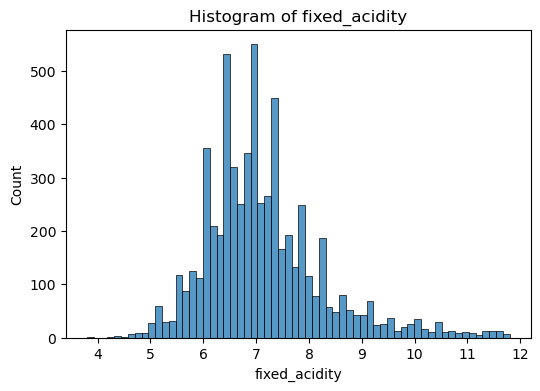

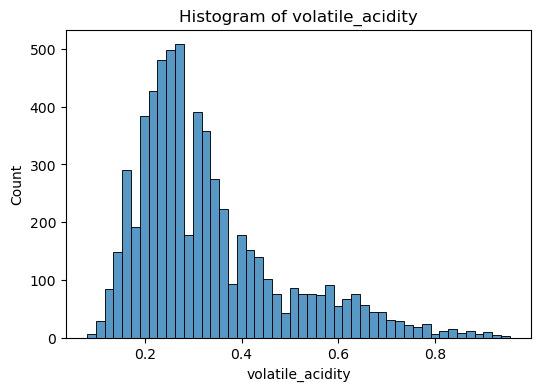

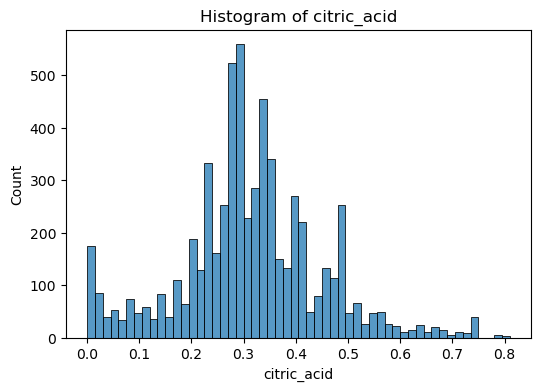

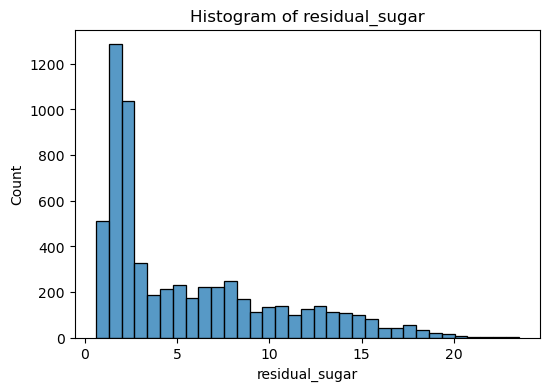

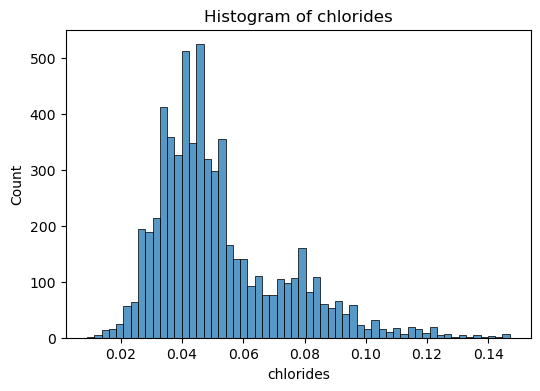

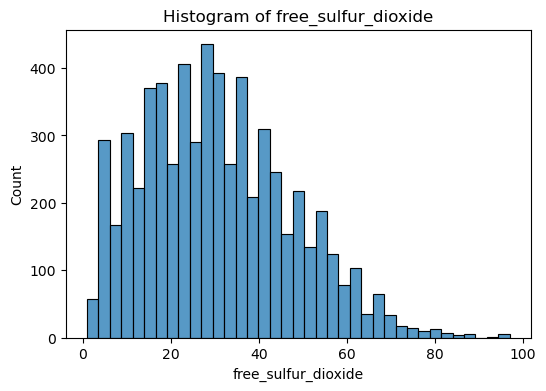

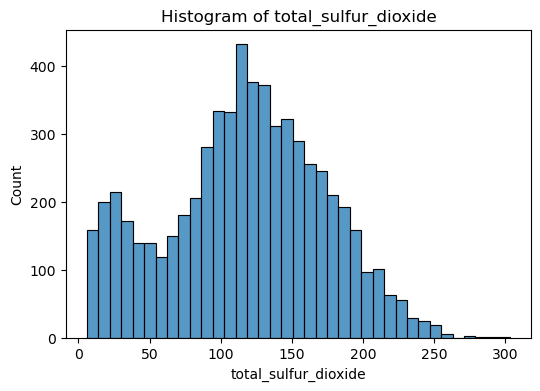

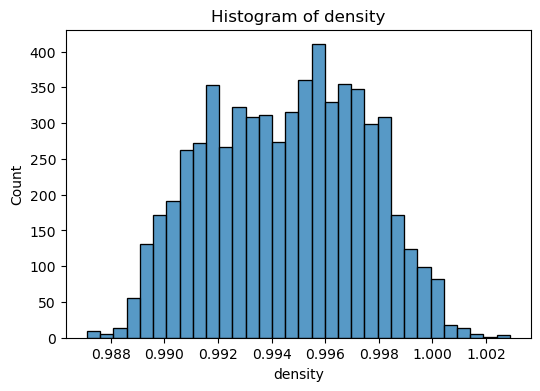

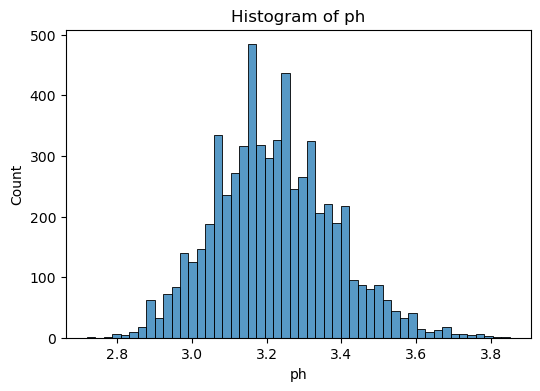

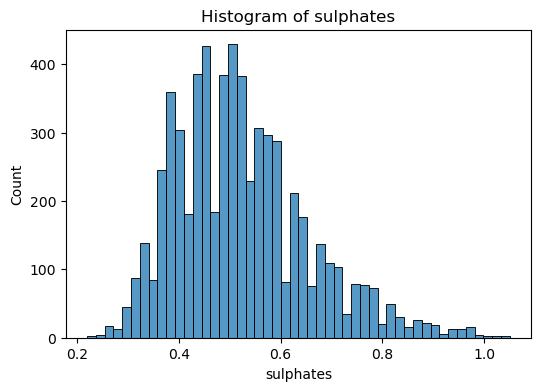

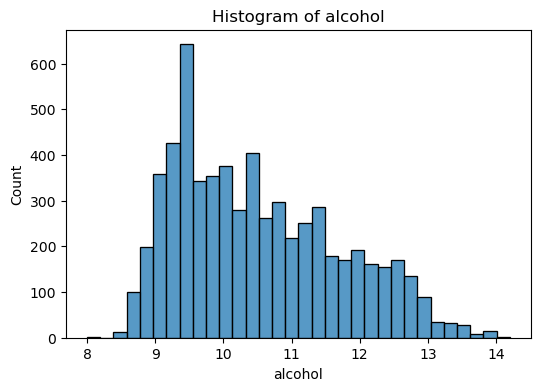

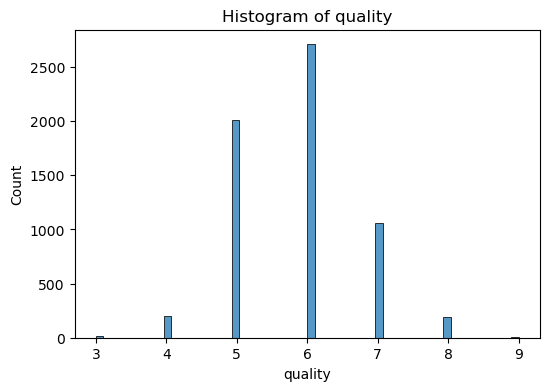

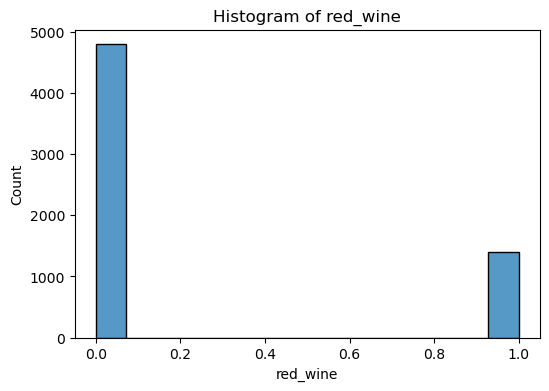

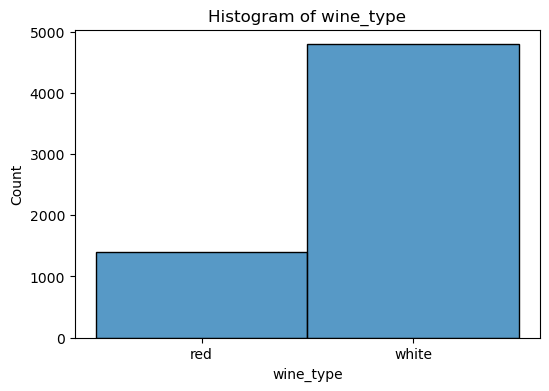

In [137]:
summarize(df)

In [138]:
analyze_missing_values(df)

,Missing Count,Missing Percentage
Attribute,,
fixed_acidity,0,0.0
volatile_acidity,0,0.0
citric_acid,0,0.0
residual_sugar,0,0.0
chlorides,0,0.0
free_sulfur_dioxide,0,0.0
total_sulfur_dioxide,0,0.0
density,0,0.0
ph,0,0.0


In [139]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .75):
    """
    Drops rows and columns from a dataframe based on the proportion of missing values.

    Args:
        df (pandas.DataFrame): The input dataframe.
        prop_required_column (float, optional): The proportion of non-missing values required for each column.
            Defaults to 0.5.
        prop_required_row (float, optional): The proportion of non-missing values required for each row.
            Defaults to 0.75.

    Returns:
        pandas.DataFrame: The modified dataframe with dropped columns and rows.

    Raises:
        None

    Example:
        modified_df = handle_missing_values(df, prop_required_column=0.6, prop_required_row=0.8)
    """
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [140]:
handle_missing_values(df, prop_required_column = .5, prop_required_row = .75)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,red_wine,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,white
6300,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,white
6301,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,white
6302,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,white


In [141]:
# rename columns add underscores
new_col_name = []

for col in df.columns:
    new_col_name.append(col.lower().replace(' ', '_'))

df.columns = new_col_name

In [147]:
df = df.reset_index().drop(columns=['index'])

In [148]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,red_wine,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6183,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,white
6184,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,white
6185,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,white
6186,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,white


In [143]:
df.quality.value_counts()

6    2708
5    2014
7    1057
4     197
8     189
3      18
9       5
Name: quality, dtype: int64

In [82]:

def nulls_by_row(df, index_id = 'id'):
    """
    """
    num_missing = df.isnull().sum(axis=1)
    pct_miss = (num_missing / df.shape[1]) * 100
    
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': pct_miss})

    rows_missing = df.merge(rows_missing,
                        left_index=True,
                        right_index=True).reset_index()[[index_id, 'num_cols_missing', 'percent_cols_missing']]
    return rows_missing.sort_values(by='num_cols_missing', ascending=False)

In [85]:
row_missing = nulls_by_row(df, 'index')

In [86]:
row_missing

,index,num_cols_missing,percent_cols_missing
0,0,0,0.0
4210,2782,0,0.0
4208,2779,0,0.0
4207,2778,0,0.0
4206,2777,0,0.0
...,...,...,...
2099,642,0,0.0
2098,641,0,0.0
2097,640,0,0.0
2096,639,0,0.0
